# Imbalanced Classification Project ~ Week 4, P.M. Kuria

## 1. Defining the Question

### a) Specifying the Data Analysis Question

We need to predict whether a customer will leave the bank soon.

### b) Understanding the Context

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.
Additionally, measure the AUC-ROC metric and compare it with the F1.

1. Download and prepare the data. Explain the procedure.
2. Examine the balance of classes. Train the model without taking into account the
imbalance. Briefly describe your findings.
3. Improve the quality of the model. Make sure you use at least two approaches to
fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.
4. Perform the final testing.

### c) Recording the Experimental Design


● Data Importation

● Data Exploration

● Data Preparation

● Data Modeling (Using Decision Trees, Random Forest and Logistic Regression)

● Model Evaluation

● Hyparameter Tuning

● Findings and Recommendations

### d) Metric of success

A model that will predict whether a customer will leave bank with an F1 score of at least 0.59

#Data Importation

##Load Libraries

In [24]:
#Let us first import the relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from joblib import dump
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
%matplotlib inline

## Load Data

In [2]:
# load dataset
df = pd.read_csv('https://bit.ly/2XZK7Bo')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


# Data Exploration: Exploratory Data Analysis (EDA)

In [4]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Our target is Exited. For our purposes, some of the columns like RowNumber, CustomerId and Surname are not going to be useful features thus will be removed. For nulls in Tenure, will impute using mean.

## Data Cleaning

In [5]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)

df['Tenure']= df['Tenure'].fillna(df['Tenure'].mean())
df['Tenure'] = df['Tenure'].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data *Visualization*

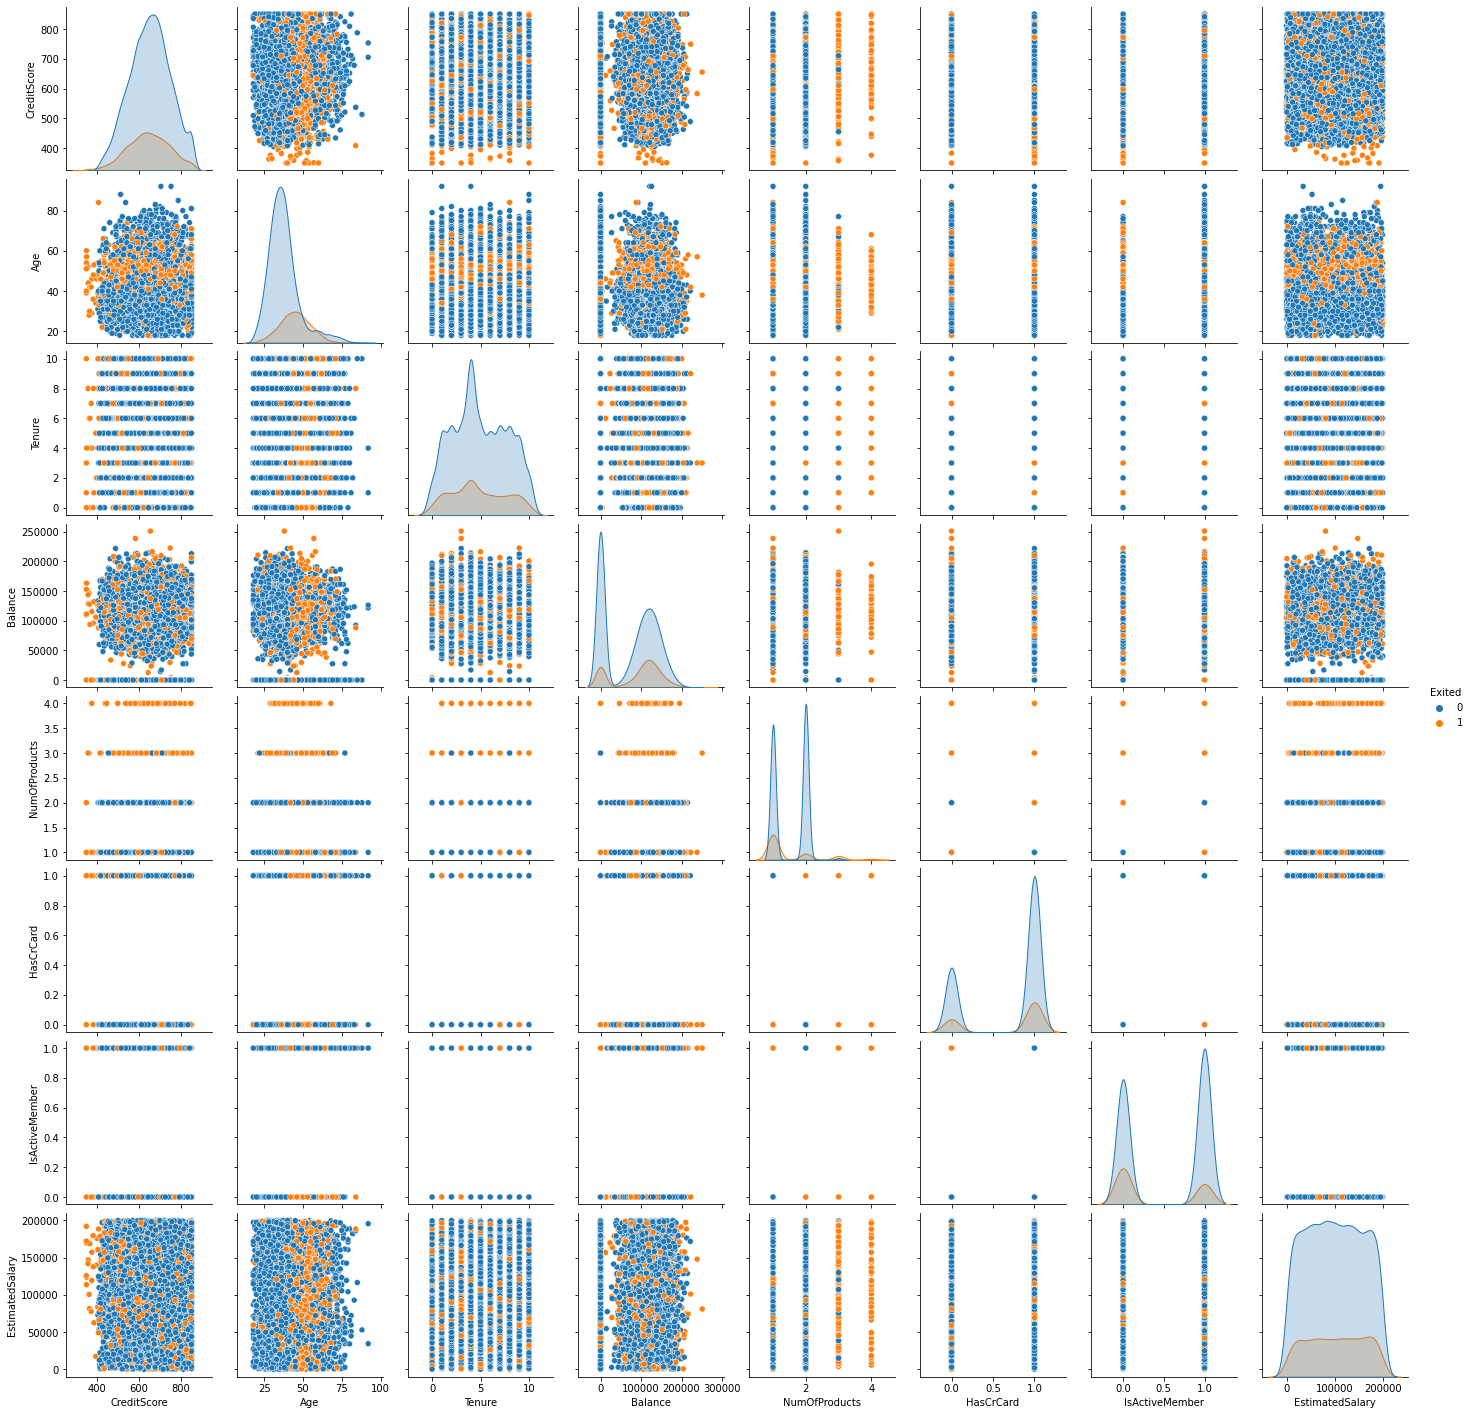

In [8]:
#Checking the distribution of the target column
sns.pairplot(df, hue = 'Exited')

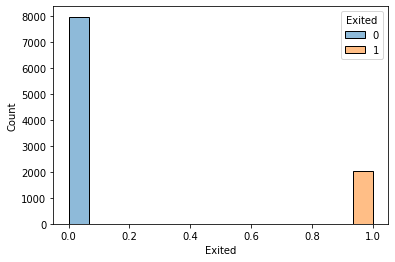

In [9]:
sns.histplot(x=df['Exited'], hue= df['Exited'])

There are more customers who haven't left. This might affect model biasness

In [10]:
#Get co-relation
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000644,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.011683,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000644,-0.011683,1.000000,-0.007301,0.011345,0.025468,-0.030212,0.010514,-0.015710
Balance,0.006268,0.028308,-0.007301,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.011345,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.025468,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.030212,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.010514,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.015710,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


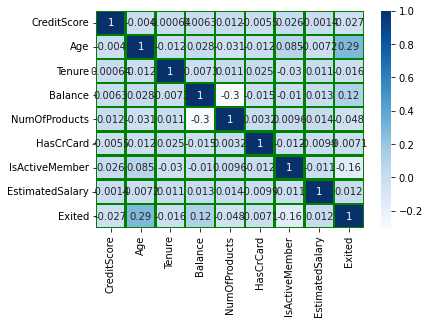

In [11]:
#plot the heat map of the correaltions
sns.heatmap(df.corr(),annot=True, cmap='Blues', linecolor='Green', linewidths=1.5)

# Data Preparation

Set target and features

In [12]:
#One hot encoding
df = pd.get_dummies(df, drop_first=True)

In [13]:
#creating a features dataframe and a target dataframe
features = df.drop(columns=['Exited'])
target =  df['Exited']


In [14]:
# Split data
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.2, random_state=12345 )

In [15]:
#normalize the data
to_normalize = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
scaler = StandardScaler()
scaler.fit(features_train[to_normalize])
features_train.loc[:,to_normalize] = scaler.transform(features_train[to_normalize])
features_valid.loc[:,to_normalize] = scaler.transform(features_valid[to_normalize])
features_test.loc[:,to_normalize] = scaler.transform(features_test[to_normalize])

One hot encoding was required because the categorical variable words don't mean anything to ML models. Allowing the 'inverse' of each data type (for example allowing both male and female coulmns to remain) will damage our outcomes since there will be high correlation between them. Therefore, it makes sense to 'drop first' and only let one of them remain. Similarly, we don't need France, Germany and Spain coulmns since a row not being 1 for Germany and Spain implies that it is France. After splitting, I checked to see if the splits make sense, and they do. The sample size is also good.

Finally, I decided to normalize the numeric columns since doing so can not hurt, and can greatly help our evaluation metrics.

# Data Modelling : Machine Learning Modelling, Evaluation and Hyparameter Tuning

## Without taking into account the imbalance

In [16]:
# First, let's look at the class imbalance (if there is any) briefly:
print(df[df['Exited'] == 1]['Exited'].count())
print(df[df['Exited'] == 0]['Exited'].count())

2037
7963


Clearly, there is an apparent imbalance, almost a 1:4 ratio. Now, let's see how much this affects our model's performance.

### Logistic Regression

In [17]:
#Let's pretend like we don't know anything about class imbalance:
LogRegModImb = LogisticRegression(solver='liblinear', random_state=12345)
LogRegModImb.fit(features_train,target_train)
print('Accuracy', LogRegModImb.score(features_valid, target_valid))
print('f1 score:' ,f1_score(target_valid, LogRegModImb.predict(features_valid)))
print('AUC:', roc_auc_score(target_valid, LogRegModImb.predict_proba(features_valid)[:,1]))

Accuracy 0.8175
f1 score: 0.3145539906103286
AUC: 0.7634576873261729


We have a accuracy of 0.81, f1 score of 0.31, and AUC of 0.76 when we do not account for imbalance and use logistic regression. We don't need to check Random Forest and Decision Tree because if the imbalance affects the results of Logistic Regression, it will naturally affect the results of Random Forest and Decision Tree since they do not perform well on imbalanced data sets.



## Taking into account the imbalance

### Logistic Regression

In [19]:
#Upsampling function
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

upsampled_LogReg_model =LogisticRegression(random_state=12345,solver='liblinear')
upsampled_LogReg_model.fit(features_upsampled, target_upsampled)
upsampled_LogReg_predicted_valid = upsampled_LogReg_model.predict(features_valid)




print('Accuracy', upsampled_LogReg_model.score(features_valid, target_valid))
print('f1 score:' ,f1_score(target_valid, upsampled_LogReg_predicted_valid))
print('AUC:',roc_auc_score(target_valid, upsampled_LogReg_model.predict_proba(features_valid)[:,1]))

Accuracy 0.454375
f1 score: 0.39332870048644897
AUC: 0.7678598237618673


Upsampling makes our f1 score 0.393. This isn't as good as the in built balanced feature of the Logisitic regression model.

In [20]:
#Downsampling function
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

down_LogReg_model =LogisticRegression(random_state=12345,solver='liblinear')
down_LogReg_model.fit(features_downsampled, target_downsampled)
down_LogReg_predicted_valid = down_LogReg_model.predict(features_valid)

print("F1:", f1_score(target_valid, down_LogReg_predicted_valid))
print('Accuracy:', down_LogReg_model.score(features_valid, target_valid))
print("AUC-ROC:", roc_auc_score(target_valid, down_LogReg_model.predict_proba(features_valid)[:,1]))

F1: 0.39145416953824946
Accuracy: 0.448125
AUC-ROC: 0.7647757836693462


Downsampling makes our f1 score 0.391. This isn't as good as the in built balanced feature of the Logisitic regression model and is almost the same as upsampling.

## Decision Tree

In [21]:
depth_param = {'max_depth':range(1,25)}
DecTreeMod = DecisionTreeClassifier(random_state=12345)
DecTreeModOpt = GridSearchCV(DecTreeMod,depth_param)
DecTreeModOpt.fit(features_train, target_train)
print(DecTreeModOpt.best_estimator_)
DecTreeModOpt_predicted_valid = DecTreeModOpt.predict(features_valid)
print("F1:", f1_score(target_valid, DecTreeModOpt_predicted_valid))
print('Accuracy:', DecTreeModOpt.score(features_valid, target_valid))
print("AUC-ROC:", roc_auc_score(target_valid, DecTreeModOpt.predict_proba(features_valid)[:,1]))

DecisionTreeClassifier(max_depth=6, random_state=12345)
F1: 0.5176991150442477
Accuracy: 0.86375
AUC-ROC: 0.8132692606191999


Just from using decision trees with optimized hyper parameters, our f1 score 0.51. This is better than the in built balanced feature of the Logisitic regression model, but not by much.

In [ ]:
# use the optimal max depth
decision_classifier = DecisionTreeClassifier(max_depth = 7, random_state = 12345)
decision_classifier.fit(features_train, target_train)
score = decision_classifier.score(features_test, target_test)
print('Score: {}'.format(score))

Score: 0.7978227060653188



*   Random Forest Classifier had the best accuracy score of 80.87%

*   Decision Tree Classifier had the second best accuracy score of 79.78%

*   Logic Regression had the least accuracy score of 76.51%





### Random Forest

In [22]:
depth_param = {'max_depth':range(1,10), 'n_estimators':range(1,50)}
RandForestMod = RandomForestClassifier(random_state=12345)
RandForestOpt = GridSearchCV(RandForestMod,depth_param)
RandForestOpt.fit(features_train, target_train)
print(RandForestOpt.best_estimator_)
RandForestOpt_predicted_valid = RandForestOpt.predict(features_valid)
print("F1:", f1_score(target_valid, RandForestOpt_predicted_valid))
print('Accuracy', RandForestOpt.score(features_valid, target_valid))
print("AUC-ROC:", roc_auc_score(target_valid, RandForestOpt.predict_proba(features_valid)[:,1]))

RandomForestClassifier(max_depth=8, n_estimators=40, random_state=12345)
F1: 0.5431578947368422
Accuracy 0.864375
AUC-ROC: 0.8501874088719589


Random forests gives us a f1 score of 0.54, although it took a very long time to run this chunk of code. If run time is a priority, the parameter space needs to be greatly reduced. However, we have come across an issue. We need an f1 score of at least 0.59, and we have already done an exhaustive search over a huge parameter space. Let us try to keep one parameter constant and increase the range of the other parameter to see if that can help us improve our score. For the above model, max_depth of 8 gave us the best result. Let's keep that constant and increase the range of n_estimators and try again. Most importantly, let us add the argument: 'class weight = balanced' since simply increasing the parameter space alone is most likely not going to increase our f1 score by so much.

In [25]:
depth_param = {'n_estimators':range(1,200)}
RandForestMod = RandomForestClassifier(random_state=12345, max_depth = 8,class_weight='balanced')
RandForestOpt = GridSearchCV(RandForestMod, depth_param)
RandForestOpt.fit(features_train, target_train)
print(RandForestOpt.best_estimator_)
RandForestOpt_predicted_valid = RandForestOpt.predict(features_valid)
print("F1:", f1_score(target_valid, RandForestOpt_predicted_valid))
print('Accuracy:', RandForestOpt.score(features_valid, target_valid))
print("AUC-ROC:", roc_auc_score(target_valid, RandForestOpt.predict_proba(features_valid)[:,1]))


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=190,
                       random_state=12345)
F1: 0.6049204052098408
Accuracy: 0.829375
AUC-ROC: 0.8607449025550203


We get a f1 score of 0.604 and the n_estimators we need is 190. Finally, we have achieved an acceptable number gives us enough confidence to take our model to the testing data. Max depth is 8 since we specified that.

## Evaluate the best model: random forest

In [26]:
RandForestOpt_predicted_test = RandForestOpt.predict(features_test)
print("F1:", f1_score(target_test, RandForestOpt_predicted_test))
print("AUC-ROC:", roc_auc_score(target_test, RandForestOpt.predict_proba(features_test)[:,1]))
print('Accuracy:', RandForestOpt.score(features_valid, target_valid))

print(classification_report(target_test, RandForestOpt_predicted_test))

F1: 0.6481876332622601
AUC-ROC: 0.869209776810373
Accuracy: 0.829375
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1573
           1       0.59      0.71      0.65       427

    accuracy                           0.83      2000
   macro avg       0.76      0.79      0.77      2000
weighted avg       0.85      0.83      0.84      2000



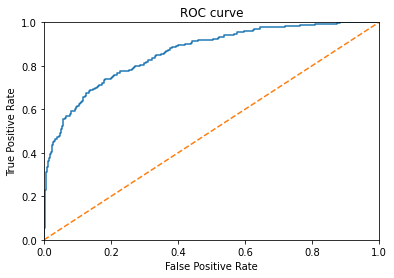

In [27]:
# Let's plot the AUC-ROC curve.
probabilities_valid = RandForestOpt.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

We see a deviation from the random model (orange line) that signifies that our model performs that much better than someone just working by chance. This is validated by the AUC we calculated.

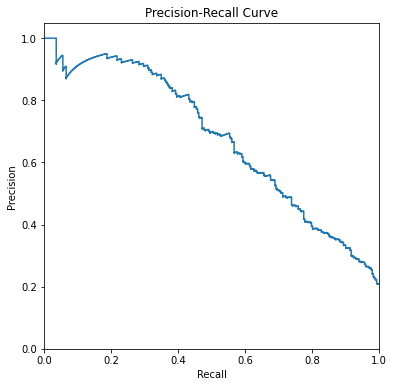

In [28]:
# Let's plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show() 

# Findings and Recommendations

## Findings

* The best model is a Random Forest Classifier. Bootstrap is set to true and the  class_weight parameter is set to ' balanced '. Setting it to balanced is very important otherwise the performance expectations are not met.

* The hyperparameters max_depth is set to 8 and n_estimators is set to 190. A random_state = 12345 will give you the exact results I produced above.

* For the test dataset, the F1 score is 0.64 and the AUC-ROC score is 0.86. Both these metrics signify good quality and meet the expectations of the assignment.

## Recommendations



*   Use of Random Forest model is recommended
*   More training data with less bias will increase the accuracy of the model
*   Hyper paramter tuning is required in order to improve model accuracy.




